In [133]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [134]:
posts_file_path = os.path.join("..", "core", "data", "raw", "TheRedPill_weeks_52.json")
posts_df = pd.read_json(posts_file_path)

In [135]:
print(len(posts_df))

5373


In [136]:
pd.set_option('display.max_columns', None)
posts_df.head(n=5)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_css_class,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,retrieved_on,score,selftext,send_replies,spoiler,steward_reports,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,updated_utc,url,whitelist_status,wls,author_flair_background_color,author_flair_text_color,thumbnail_height,thumbnail_width,media,media_embed,post_hint,preview,secure_media,secure_media_embed,banned_by,author_cakeday,edited,media_metadata,author_created_utc,author_flair_template_id,category,content_categories,gilded,removal_reason,suggested_sort,archived,can_gild,distinguished,hidden,quarantine,subreddit_name_prefixed,crosspost_parent,crosspost_parent_list,author_premium,treatment_tags,upvote_ratio
0,[],0.0,Gavin-Sangria,None,[],None,text,t2_4jylj5mz,0.0,[],False,False,1569559102,self.TheRedPill,https://www.reddit.com/r/TheRedPill/comments/d...,{},d9vf4l,False,False,False,False,0.0,True,False,,bp,"[{'e': 'text', 't': 'Blue Pill Example'}]",f656786c-9009-11e2-8e87-12313d183eb5,Blue Pill Example,dark,richtext,False,False,True,0,0,False,no_ads,/r/TheRedPill/comments/d9vf4l/blue_pulled_cele...,False,0.0,1569559103,1,[removed],True,False,[],False,TheRedPill,t5_2ve1u,0,public,self,"Blue pulled celebrities who wasted their smv, ...",0.0,1.569645e+09,https://www.reddit.com/r/TheRedPill/comments/d...,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],0.0,treehugger195050,None,[],None,text,t2_2w4t467n,0.0,[],False,False,1569551940,self.TheRedPill,https://www.reddit.com/r/TheRedPill/comments/d...,{},d9u5ql,False,False,False,False,0.0,True,False,,NaN,[],NaN,NaN,dark,text,False,False,True,2,0,False,no_ads,/r/TheRedPill/comments/d9u5ql/need_help_in_bet...,False,0.0,1569551942,1,[removed],True,False,[],False,TheRedPill,t5_2ve1u,0,public,self,Need Help - In Beta Male LDR with Filipina,0.0,1.569638e+09,https://www.reddit.com/r/TheRedPill/comments/d...,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],0.0,BFlocka,None,[],None,text,t2_pfd86,0.0,[],False,False,1569551575,self.TheRedPill,https://www.reddit.com/r/TheRedPill/comments/d...,{},d9u37g,False,False,False,False,1.0,True,False,,NaN,[],NaN,NaN,dark,text,False,False,True,10,0,False,no_ads,/r/TheRedPill/comments/d9u37g/just_had_to_swal...,False,0.0,1569551576,0,"I’m 23, first year out of college, gf is also ...",True,False,[],False,TheRedPill,t5_2ve1u,0,public,self,Just had to swallow a massive redpill tonight ...,0.0,1.569638e+09,https://www.reddit.com/r/TheRedPill/comments/d...,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],0.0,Ragomai,None,[],None,text,t2_fgfrn,0.0,[],False,False,1569550482,self.TheRedPill,https://www.reddit.com/r/TheRedPill/comments/d...,{},d9tvxf,False,False,False,False,1.0,True,False,,unflaired,[],NaN,NaN,dark,text,False,False,True,8,0,False,no_ads,/r/TheRedPill/comments/d9tvxf/when_it_actually...,False,0.0,1569550484,2,i've always known in the back of my mind that ...,True,False,[],False,TheRedPill,t5_2ve1u,0,public,self,"When it actually hits you how accurate RP is, ...",0.0,1.569637e+09,https://www.reddit.com/r/TheRedPill/comments/d...,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [137]:
posts_df['created_date'] = pd.to_datetime(
    posts_df['created_utc'].apply(
        lambda x: None if np.isnan(x) else datetime.fromtimestamp(x)),
    errors='coerce')

posts_df['created_date'] = posts_df['created_date'].dt.date

In [138]:
print(posts_df.created_date.min())
print(posts_df.created_date.max())

2018-08-11
2019-09-26


In [139]:
posts_df.set_index('created_date', inplace=True)

In [140]:
posts_by_date = posts_df.groupby(posts_df.index).size().to_frame('num_posts')
posts_by_date.reset_index(inplace=True)

In [141]:
subset_posts = posts_by_date[posts_by_date['created_date'] > datetime.strptime('2018-08-01', "%Y-%m-%d").date()]
subset_posts = subset_posts[subset_posts['created_date'] < datetime.strptime('2019-03-01', "%Y-%m-%d").date()]

  created_date  num_posts
0   2018-08-11         26
1   2018-08-12         23
2   2018-08-13         53
3   2018-08-14         32
4   2018-08-15         35


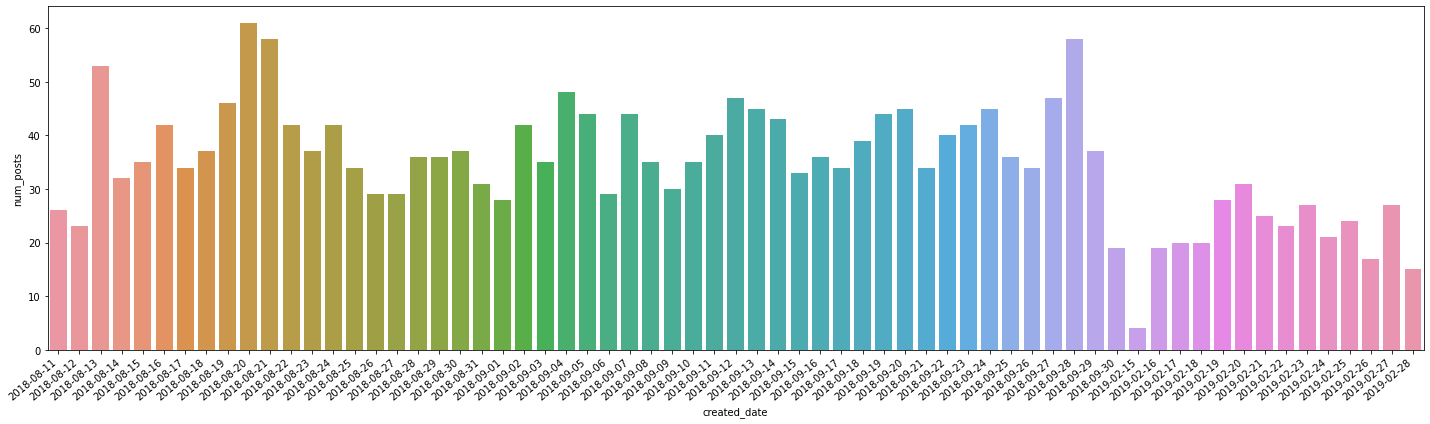

In [142]:
print(subset_posts.head())
plt.figure(figsize=(20,6))
ax = sns.barplot(x='created_date', y="num_posts", data=subset_posts)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [149]:
posts_df[posts_df.index == datetime.strptime('2018-09-30', "%Y-%m-%d").date()].sort_values('created_utc')

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_css_class,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,retrieved_on,score,selftext,send_replies,spoiler,steward_reports,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,updated_utc,url,whitelist_status,wls,author_flair_background_color,author_flair_text_color,thumbnail_height,thumbnail_width,media,media_embed,post_hint,preview,secure_media,secure_media_embed,banned_by,author_cakeday,edited,media_metadata,author_created_utc,author_flair_template_id,category,content_categories,gilded,removal_reason,suggested_sort,archived,can_gild,distinguished,hidden,quarantine,subreddit_name_prefixed,crosspost_parent,crosspost_parent_list,author_premium,treatment_tags,upvote_ratio
created_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-09-30,NaN,NaN,lapeparoja,None,[],None,text,t2_14sxn6,0.0,NaN,False,False,1538283654,self.TheRedPill,https://www.reddit.com/r/TheRedPill/comments/9...,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",9k3oh2,False,False,False,False,0.0,True,False,,None,[],None,None,dark,text,False,False,True,0,0,False,no_ads,/r/TheRedPill/comments/9k3oh2/how_to_succeed_w...,False,0.0,1543815846,1,[removed],True,False,NaN,False,TheRedPill,t5_2ve1u,0,public,default,How to Succeed with Brunettes,NaN,NaN,https://www.reddit.com/r/TheRedPill/comments/9...,no_ads,0.0,None,None,NaN,NaN,None,{},NaN,NaN,None,{},NaN,NaN,1.538284e+09,NaN,1.485458e+09,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,r/TheRedPill,NaN,NaN,NaN,NaN,NaN
2018-09-30,NaN,NaN,aquickquestionplzthx,None,[],None,text,t2_1u5zyidb,0.0,NaN,False,False,1538283867,self.TheRedPill,https://www.reddit.com/r/TheRedPill/comments/9...,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",9k3ph4,False,False,False,False,0.0,True,False,,unflaired,[],None,None,dark,text,False,False,True,1,0,False,no_ads,/r/TheRedPill/comments/9k3ph4/fair_process_tur...,False,0.0,1543815858,0,[removed],True,False,NaN,False,TheRedPill,t5_2ve1u,0,public,default,Fair Process turns into Kangeroo Court - Why e...,NaN,NaN,https://www.reddit.com/r/TheRedPill/comments/9...,no_ads,0.0,None,None,NaN,NaN,None,{},NaN,NaN,None,{},NaN,NaN,NaN,NaN,1.532356e+09,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,r/TheRedPill,NaN,NaN,NaN,NaN,NaN
2018-09-30,NaN,NaN,VolatileEnemy,None,[],None,text,t2_1gh68027,0.0,NaN,False,False,1538285941,self.TheRedPill,https://www.reddit.com/r/TheRedPill/comments/9...,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",9k3xln,False,False,False,False,0.0,True,False,,meta,"[{'e': 'text', 't': 'Meta'}]",4adbe832-90b3-11e2-aa77-12313d18803b,Meta,dark,richtext,False,False,False,23,0,False,no_ads,/r/TheRedPill/comments/9k3xln/i_dont_care_who_...,False,0.0,1543815960,5,[removed],True,False,NaN,False,TheRedPill,t5_2ve1u,0,public,default,I don't care who it offends I'm still going to...,NaN,NaN,https://www.reddit.com/r/TheRedPill/comments/9...,no_ads,0.0,None,None,NaN,NaN,None,{},NaN,NaN,None,{},NaN,NaN,1.538286e+09,NaN,1.527460e+09,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,r/TheRedPill,NaN,NaN,NaN,NaN,NaN
2018-09-30,NaN,NaN,CasaDeFranco,points,"[{'e': 'text', 't': '2'}]",2,richtext,t2_pqn9b67,0.0,NaN,False,False,1538289193,self.TheRedPill,https://www.reddit.com/r/TheRedPill/comments/9...,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",9k48eo,False,False,False,False,1.0,True,False,,unflaired,[],None,None,dark,text,False,False,False,26,0,False,no_ads,/r/TheRedPill/comments/9k48eo/the_allegory_of_...,False,0.0,1543

In [150]:
posts_930 = posts_df[posts_df.index == datetime.strptime('2018-09-30', "%Y-%m-%d").date()].sort_values('created_utc')